<a href="https://colab.research.google.com/github/hamel-amir/Projet_Machine_learning/blob/main/bank_additional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#from numpy import np
import pandas as pd
df = pd.read_csv('/content/bank-additional-full.csv', sep=";")

Dimension du Datafrmae

In [3]:
df.shape

(41188, 21)

In [4]:
# les attributs(features) du dataset
df.columns
#df['job'].unique()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Présence de valeurs manquantes**

In [5]:
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

**Présence d'attributs constants et quasi constant**

In [6]:
!pip install fast-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 2.6 MB/s eta 0:00:00


In [7]:
# Attribut quasi constant
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features
constant_features=get_constant_features(df)
quasi_constant=constant_features.loc[constant_features['Desc']=="Quasi Constant"]
if len(quasi_constant)==0:
  print("ya pas d'attributs quasi constants")
else:
   print(quasi_constant)

ya pas d'attributs quasi constants


In [8]:
# Attribut constant
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features
constant_features=get_constant_features(df)
constant=constant_features.loc[constant_features['Desc']=="Constant"]
if len(constant)==0:
  print("ya pas d'attributs constants")
else:
   print(constant)

ya pas d'attributs constants


**churné vs non churné**

In [76]:
# extraire les variables churn (binaires)

def extact_churn():
  churn_att=[]
  for column in df.columns:
    if len(df[column].unique())==2:
      churn_att.append(column)
  return churn_att

churn_variable=extact_churn()
churn_variable

['contact', 'y']

Proportion d'individu qui ont churné

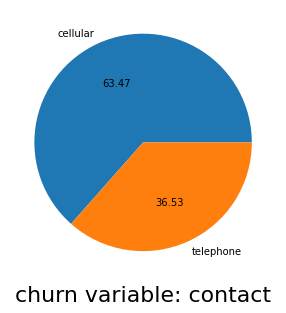

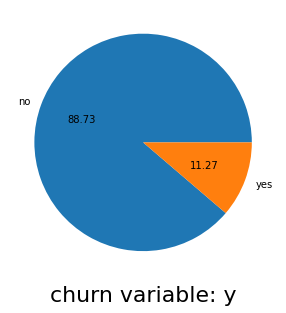

In [90]:
# variables churn
import matplotlib.pyplot as plt
import numpy as np
for churn in churn_variable:
  fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
  df.groupby(churn).size().plot(kind='pie', autopct='%.2f', ax=ax1)
  #df.groupby('contact').size().plot(kind='pie', autopct='%.2f', ax=ax2)
  ax1.set_xlabel(f'churn variable: {churn}', size=22)
  ax1.set_ylabel('', size=22)
  
plt.show() 

Churn vs qualitative


In [40]:
# extraire les variables qualitative 
qualitative_att=df.select_dtypes(include=["object"]).columns
qualitative_variable=[]
for x in qualitative_att:
  if x  not in churn_variable:
    qualitative_variable.append(x)

qualitative_variable

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'day_of_week',
 'poutcome']

Qualitative vs churn

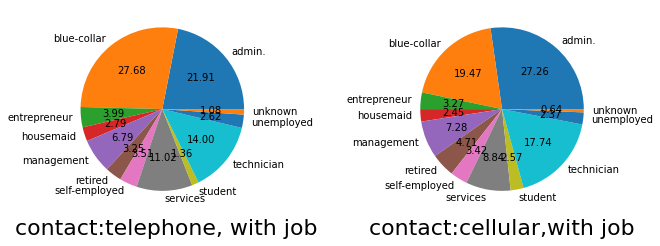

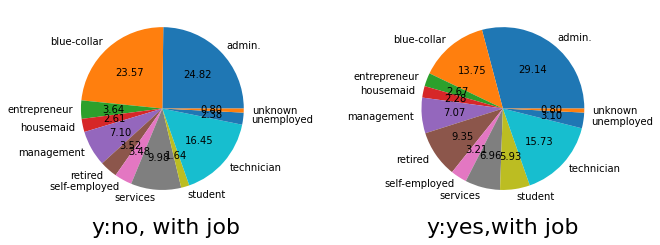

In [85]:
# qualitative features with churn variables
def qualitative_churn (column_name):
  if len(churn_variable)==0:
    print('ya aucune variable churn')
  else:
      for churn in churn_variable:
        modalities=df[churn].unique()
        dt_churn=df.loc[df[churn]==modalities[0]]
        dt_no_churn=df.loc[df[churn]==modalities[1]]
        fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
        dt_churn.groupby(column_name).size().plot(kind='pie', autopct='%.2f', ax=ax1)
        dt_no_churn.groupby(column_name).size().plot(kind='pie', autopct='%.2f', ax=ax2)
        ax1.set_xlabel(f' {churn}:{modalities[0]}, with {column_name}', size=22)
        ax1.set_ylabel('', size=22)
        ax2.set_xlabel(f'{churn}:{modalities[1]},with {column_name}', size=22)
        ax2.set_ylabel('', size=22)
        fig1.tight_layout(pad=4) # set space

  plt.show() 
#  veuillez choisir une variable qualitative a passer en parametre de la fonction
qualitative_churn(qualitative_variable[0])


In [52]:
# def qualitative_churn_contact (column_name):
#   dt_churn=df.loc[df['contact']=='telephone']
#   dt_no_churn=df.loc[df['contact']=='cellular']
#   fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 6))
#   dt_churn.groupby(column_name).size().plot(kind='pie', autopct='%.2f', ax=ax1)
#   dt_no_churn.groupby(column_name).size().plot(kind='pie', autopct='%.2f', ax=ax2)
#   ax1.set_ylabel(f'telephone with {column_name}', size=22)
#   ax2.set_ylabel(f'cellular with {column_name}', size=22)
#   plt.show() 

# qualitative_churn_contact('education')

Quantitative (numerique) with churn

In [57]:
# extraire les variables quantitatives(numériques)
quantitative_att=df.select_dtypes(include=["int64","float64"]).columns
quantitative_variable=[]
for x in quantitative_att:
  if x  not in churn_variable:
    quantitative_variable.append(x)

quantitative_variable

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [91]:
# quantitative(numerique) features with churn variables
def quantitative_churn (column_name):
  if len(churn_variable)==0:
    print('ya aucune variable churn')
  else:
      for churn in churn_variable:
        modalities=df[churn].unique()
        dt_churn=df.loc[df[churn]==modalities[0]]
        dt_no_churn=df.loc[df[churn]==modalities[1]]
        fig1, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
        dt_churn[column_name].hist(alpha=0.5, bins=20, label=f'Churn({modalities[0]})')
        dt_no_churn[column_name].hist(alpha=0.5, bins=20, label=f'Churn({modalities[1]})')
        plt.legend(loc='upper right')
        plt.title(f"distribution de la variable {column_name} par rapport a la variable churn {churn}")
        plt.xlabel(column_name)
        fig1.tight_layout(pad=5) # set space


  plt.show() 

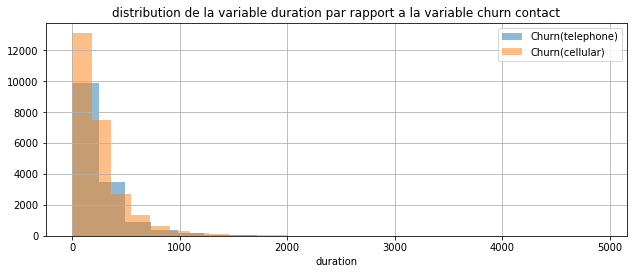

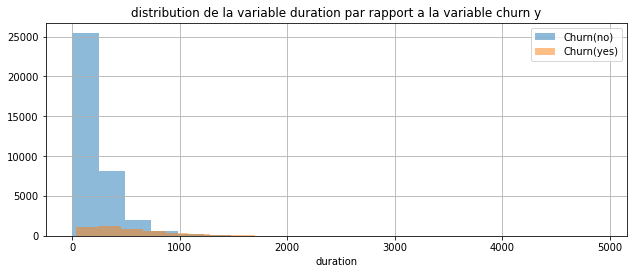

In [92]:
#  veuillez choisir une variable quantitative a passer en parametre de la fonction
quantitative_churn(quantitative_variable[1])

**La matrice de corrélation des attributs**

In [93]:
# Matrice de correlation
# Compute the correlation matrix
corr = df.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Hearmap de corrélation


<AxesSubplot:>

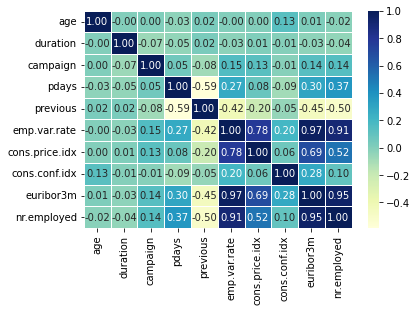

In [94]:
# Heatmap correlation
import seaborn as sns

# Create heatmap
sns.heatmap(corr,cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)